In [10]:
#https://github.com/Volodymyrk/stats-testing-in-python/blob/master/01%20-%20Single%20Sample%20tests%20for%20Mean.ipynb

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
from IPython.display import Image

import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
from collections import OrderedDict

from __future__ import print_function
%matplotlib inline

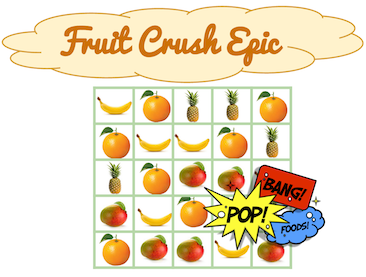

In [12]:
Image('https://cloud.githubusercontent.com/assets/5244286/7022699/52b0b7a6-dd26-11e4-9886-83db9ee1bfe7.png')

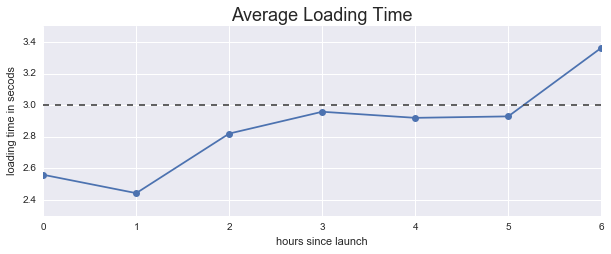

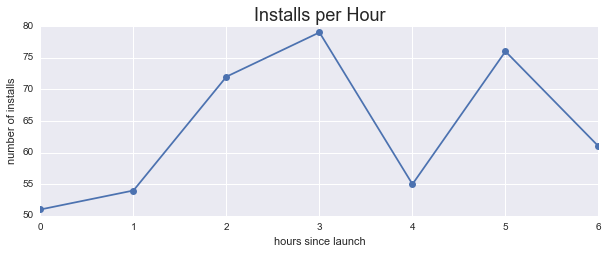

In [43]:
# First, we generate some fake data, that we are going to analyse later
obs_hrs = 7  # your game was released 7 hours ago
e_inst = 60 # expected number of installs per hour
t_load = []
t_load_avg = []
#np.random.seed(12) # Seed needed to reproduce our particular scenario

for ix, installs in enumerate(np.random.poisson(lam=e_inst, size=obs_hrs)):
    t_load.append( np.random.gamma(shape=3, scale=.95, size=installs) )
    t_load_avg.append( loading_times[ix].mean() )

fig, ax = plt.subplots(figsize=(10,3.4))    
plot(t_load_avg, marker='o')
title('Average Loading Time', fontdict={'size':18})
plot([0,obs_hrs-1],[3,3],'--',color='0.3')
xlabel('hours since launch')
ylabel('loading time in secods')
ylim(2.3,3.5)
# fig.savefig('01.01.png', dpi=200)

fig, ax = plt.subplots(figsize=(10,3.4))    
plot([len(x) for x in loading_times], marker='o')
title('Installs per Hour', fontdict={'size':18})
xlabel('hours since launch')
ylabel('number of installs');
pass
# fig.savefig('01.02.png', dpi=200)

([], <a list of 0 Text xticklabel objects>)

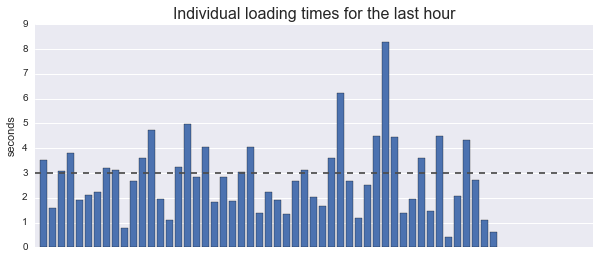

In [57]:
fig, ax = plt.subplots(figsize=(10,4))
bar(range(t_load[6].shape[0]), t_load[6], align='center')
plot([-1,100],[3,3],'--',color='0.3')
xlim(-1,61)
title('Individual loading times for the last hour', fontdict={'size':16})
ylabel('seconds')
xticks([])

In [61]:
# Same thing, using t-test from scipy.stats
import scipy.stats as stats
t, p = stats.ttest_1samp(loading_times[6], popmean=3.0)

print('t-statistic = {t} \np-value = {p}'.format(t=t,p=p/2))

t-statistic = 1.38005787853313 
p-value = 0.08634481804336265


In [62]:
p

0.1726896360867253